In [1]:
from dreye.hardware import nidaqmx
from dreye.hardware import seabreeze
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
leds = ['duv', 'uv', 'violet', 'rblue', 'lime', 'orange']
channels = ['Dev2/ao1', 'Dev3/ao1', 
            'Dev3/ao0', 'Dev1/ao1', 
            'Dev2/ao0', 'Dev1/ao0']
zeros = [4.4] * 5 + [0.]
maxs = [0.] * 5 + [5.]
trigger = 'Dev4/ao0'

Just to run specific measurement

In [3]:
outputs = []
for led, ch, z, m in zip(leds, channels, zeros, maxs):
    outputs.append(
        nidaqmx.NiDaqMxOutput(
            ch, led, 
            zero_boundary=z, 
            max_boundary=m, 
            units='V'
        )
    )

In [4]:
system = nidaqmx.NiDaqMxSystem(outputs)

In [5]:
system

NiDaqMxSystem contains:
NiDaqMxOutput(object=Dev2/ao1, name=duv, max=0.0 volt, zero=4.4 volt)
NiDaqMxOutput(object=Dev3/ao1, name=uv, max=0.0 volt, zero=4.4 volt)
NiDaqMxOutput(object=Dev3/ao0, name=violet, max=0.0 volt, zero=4.4 volt)
NiDaqMxOutput(object=Dev1/ao1, name=rblue, max=0.0 volt, zero=4.4 volt)
NiDaqMxOutput(object=Dev2/ao0, name=lime, max=0.0 volt, zero=4.4 volt)
NiDaqMxOutput(object=Dev1/ao0, name=orange, max=5.0 volt, zero=0.0 volt)

In [6]:
spec = seabreeze.Spectrometer(
    'calibration.IRRADCAL', 
    integration_time=0.05, max_it=0.01, 
)

In [7]:
spec.min_it

0.001

In [8]:
spec.max_it

0.01

In [9]:
from dreye.hardware.measurement_runner import MeasurementRunner

In [10]:
runner = MeasurementRunner(
    system, 
    spec, 
    wls=np.arange(200, 800, 0.5), 
    smoothing_window=2
)

In [11]:
runner.run(2)


-----------STARTING MEASUREMENTS-------------

---------------------------------------------
Starting measurement for duv.
sending 10 values
number 0: value 4.4
number 1: value 3.9111111111111114
number 2: value 3.4222222222222225
number 3: value 2.9333333333333336
number 4: value 2.4444444444444446
number 5: value 1.9555555555555557
number 6: value 1.4666666666666668
number 7: value 0.9777777777777779
number 8: value 0.48888888888888893
number 9: value 0.0
Finished measurement for "duv".
---------------------------------------------

Finished conversion of measurement for "duv".

---------------------------------------------
Starting measurement for uv.
sending 10 values
number 0: value 4.4
number 1: value 3.9111111111111114
number 2: value 3.4222222222222225
number 3: value 2.9333333333333336
number 4: value 2.4444444444444446
number 5: value 1.9555555555555557
number 6: value 1.4666666666666668
number 7: value 0.9777777777777779
number 8: value 0.48888888888888893
number 9: value 0

In [12]:
import matplotlib.pyplot as plt

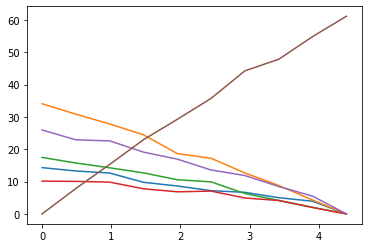

In [13]:
plt.plot(
    system.spms.domain, system.spms
)

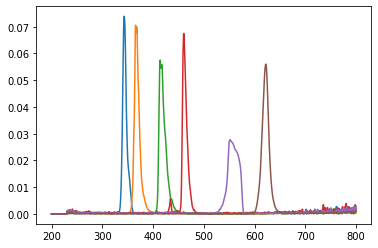

In [14]:
plt.plot(
    system.spms.normalized_spectrum.wavelengths, 
    system.spms.normalized_spectrum)